In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
pwd

'C:\\Carey_doc\\Code_Test\\FintechAI'

check user data

In [3]:
#################
# Start here    #
#################

pwd = os.getcwd()

df_users = pd.read_csv( pwd+'/users.052317.csv', encoding='utf-8') #user, need to find a way to link them, since it is only individual record. 


In [65]:
print(df_users.shape)
df_users.isnull().sum()

(50905, 6)


id               0
username         0
bio1          4144
bio2          4065
bio3          7481
created_at       0
dtype: int64

In [71]:
#drop NaN in bio* to make the data clean
df_users = df_users.dropna(axis=0)
print(df_users.shape)
df_users.head(10)

(43424, 6)


,id,username,bio1,bio2,bio3,created_at
14,1079,jesseyoungmann,Non Professional,Information Technology,Software,2011-12-13
16,1081,jessmchung,Non Professional,Information Technology,Software,2011-11-01
18,1086,biggercapital,Non Professional,Consumer Discretionary,"Textiles, Apparel & Luxury Goods",2011-11-01
19,1091,joshh031,Financial Professional,Buy Side,Hedge Fund,2011-11-01
21,1095,thomson,Non Professional,Information Technology,Internet Software & Services,2011-11-01
22,1096,ToddSullivan,Financial Professional,Buy Side,Hedge Fund,2011-11-01
26,1117,sspencer_smb,Financial Professional,Buy Side,Proprietary Trading Firm,2011-11-01
29,1121,weissben,Non Professional,Information Technology,Software,2011-11-01
34,1555,Jcmeg35,Non Professional,Industrials,Commercial Services & Supplies,2011-11-01
37,1151,bbolan1,Financial Professional,Buy Side,Asset Manager,2011-11-01


In [76]:
print(df_users['bio1'].value_counts())


Non Professional          39361
Financial Professional     4063
Name: bio1, dtype: int64


In [77]:
print(df_users['bio2'].value_counts())

Other                         32271
Information Technology         3036
Independent                    1798
Buy Side                       1368
Financials                     1137
Sell Side                       895
Health Care                     657
Industrials                     634
Consumer Discretionary          530
Materials                       299
Energy                          290
Consumer Staples                214
Telecommunication Services      208
Utilities                        85
Купить Side                       1
Independiente                     1
Name: bio2, dtype: int64


In [78]:
print(df_users['bio3'].value_counts())

Other                                  33242
Independent Research                    1068
Software                                1017
Internet Software & Services             777
IT Services                              766
Broker                                   574
Hedge Fund                               492
Asset Manager                            414
Health Care Providers & Services         313
Professional Services                    287
Capital Markets                          275
Oil, Gas & Consumable Fuels              173
Computers & Peripherals                  169
Construction & Engineering               133
Diversified Financial Services           124
Insurance                                121
Specialty Retail                         120
Paper & Forest Products                  118
Consumer Finance                         115
Real Estate Development                  111
Diversified Telecommunications           109
Biotechnology                            105
Aerospace 

check release data

In [ ]:
# get release data
df_release = pd.read_csv( pwd+'/releases.052317.csv', encoding='utf-8') #earning release?

In [4]:
print(df_release.shape)
df_release.columns

(369625, 21)


Index(['id', 'instrument_id', 'sector', 'industry', 'ticker', 'fiscal_year',
       'fiscal_quarter', 'reports_at', 'metric', 'actual', 'metric_id',
       'estimize_mean', 'select_mean', 'estimize_count', 'wallstreet_mean',
       'estimize_high', 'estimize_low', 'wallstreet_high', 'wallstreet_low',
       'guidance_high', 'guidance_low'],
      dtype='object')

In [5]:
#need to loop for each ticker, fiscal_year and fiscal_quarter
stock_list = df_release['ticker'].unique() #plan to loop for each ticker, fiscal_year and fiscal_quarter
#totally 2913 stocks
print(stock_list) 
print(len(stock_list))
df_release_pivot = df_release.set_index(['ticker', 'fiscal_year', 'fiscal_quarter']).sort_index()
# How many fiscal years and quarters do we need in the feature set?
# Whether we need to also include data from 1999? Guess not many estimize records?
df_release_pivot

['BWP' 'GDDY' 'SNAK' ..., 'NHTC' 'GLBR' 'TBRA']
2913


id  instrument_id       sector  \
ticker fiscal_year fiscal_quarter                                       
A      1999        1                71987           1384  Health Care   
                   2                71990           1384  Health Care   
                   3                71991           1384  Health Care   
                   4                71993           1384  Health Care   
       2000        1                71995           1384  Health Care   
                   1                71995           1384  Health Care   
                   2                71999           1384  Health Care   
                   2                71999           1384  Health Care   
                   3                72002           1384  Health Care   
                   3                72002           1384  Health Care   
                   4                72004           1384  Health Care   
                   4                72004           1384  Health Care   
       2001        1                72007           1384  Health Care   
                   1                72007           1384  Health Care   
                   2                72010           1384  Health Care   
                   2                72010           1384  Health Care   
                   3                72012           1384  Health Care   
                   3                72012           1384  Health Care   
                   4                72014           1384  Health Care   
                   4                72014           1384  Health Care   
       2002        1                72017           1384  Health Care   
                   1                72017           1384  Health Care   
                   2                72019           1384  Health Care   
                   2                72019           1384  Health Care   
                   3                72021           1384  Health Care   
                   3                72021           1384  Health Care   
                   4                72022           1384  Health Care   
                   4                72022           1384  Health Care   
       2003        1                72024           1384  Health Care   
                   1                72024           1384  Health Care   
...                                   ...            ...          ...   
ZYNE   2016        3               146467           2946  Health Care   
                   3               146467           2946  Health Care   
                   4               146468           2946  Health Care   
                   4               146468           2946  Health Care   
                   4               146468           2946  Health Care   
                   4               146468           2946  Health Care   
       2017        1               146469           2946  Health Care   
                   1               146469           2946  Health Care   
                   1               146469           2946  Health Care   
                   1               146469           2946  Health Care   
                   1               146469           2946  Health Care   
                   1               146469           2946  Health Care   
                   2               146470           2946  Health Care   
                   2               146470           2946  Health Care   
                   2               146470           2946  Health Care   
                   2               146470           2946  Health Care   
                   2               146470           2946  Health Care   
                   2               146470           2946  Health Care   
                   3               146471           2946  Health Care   
                   3               146471           2946  Health Care   
                   3               146471           2946  Health Care   
                   3               146471           2946  Health Care   
                   3    

In [6]:
df_release.isnull().sum()

id                      0
instrument_id           0
sector                  0
industry                0
ticker                  0
fiscal_year             0
fiscal_quarter          0
reports_at              0
metric                  0
actual              33320
metric_id               0
estimize_mean      200172
select_mean        199405
estimize_count     200211
wallstreet_mean      1866
estimize_high      312826
estimize_low       312826
wallstreet_high    278650
wallstreet_low     278650
guidance_high      369625
guidance_low       369625
dtype: int64

In [7]:
#drop guidance_high and guidance_low, always NaN
df_release = df_release.dropna(axis=1, how='all') 
df_release.shape

(369625, 19)

In [8]:
#drop actual == NaN, since we don't know beat or not...
df_release = df_release.dropna(axis=0, subset=['actual'])
df_release.shape

(336305, 19)

In [9]:
#UAA eps has three records, looks quite the same except last four columns, so may need to combine them into one record.
df_release_uaa_eps = df_release[(df_release['ticker']=='UAA') & (df_release['fiscal_year'] == 2017) & (df_release['metric'] == 'eps')]
df_release_uaa_eps


,id,instrument_id,sector,industry,ticker,fiscal_year,fiscal_quarter,reports_at,metric,actual,metric_id,estimize_mean,select_mean,estimize_count,wallstreet_mean,estimize_high,estimize_low,wallstreet_high,wallstreet_low
115823,122711,232,Consumer Discretionary,"Textiles, Apparel & Luxury Goods",UAA,2017,1,2017-04-27 10:00:00,eps,-0.01,1,-0.001288,-0.022072,163.0,-0.039,0.1,0.1,NaN,NaN
116517,122711,232,Consumer Discretionary,"Textiles, Apparel & Luxury Goods",UAA,2017,1,2017-04-27 10:00:00,eps,-0.01,1,-0.001288,-0.022072,163.0,-0.039,NaN,NaN,NaN,NaN
131224,122711,232,Consumer Discretionary,"Textiles, Apparel & Luxury Goods",UAA,2017,1,2017-04-27 10:00:00,eps,-0.01,1,-0.001288,-0.022072,163.0,-0.039,NaN,NaN,-0.03,-0.06


In [10]:
#fill NaN with available value, then drop duplicate record.
df_release_uaa_eps.loc[:,'estimize_high']=df_release_uaa_eps.loc[:,'estimize_high'].fillna(value=df_release_uaa_eps['estimize_high'].max())
df_release_uaa_eps.loc[:,'estimize_low']=df_release_uaa_eps.loc[:,'estimize_low'].fillna(value=df_release_uaa_eps['estimize_low'].max())
df_release_uaa_eps.loc[:,'wallstreet_high']=df_release_uaa_eps.loc[:,'wallstreet_high'].fillna(value=df_release_uaa_eps['wallstreet_high'].max())
df_release_uaa_eps.loc[:,'wallstreet_low']=df_release_uaa_eps.loc[:,'wallstreet_low'].fillna(value=df_release_uaa_eps['wallstreet_low'].max())
df_release_uaa_eps_record = df_release_uaa_eps.drop_duplicates()
df_release_uaa_eps_record # get one UAA eps release record

C:\Users\wangz\Anaconda2\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,id,instrument_id,sector,industry,ticker,fiscal_year,fiscal_quarter,reports_at,metric,actual,metric_id,estimize_mean,select_mean,estimize_count,wallstreet_mean,estimize_high,estimize_low,wallstreet_high,wallstreet_low
115823,122711,232,Consumer Discretionary,"Textiles, Apparel & Luxury Goods",UAA,2017,1,2017-04-27 10:00:00,eps,-0.01,1,-0.001288,-0.022072,163.0,-0.039,0.1,0.1,-0.03,-0.06


In [11]:
#UAA revenue also has three records and similar situation as eps, only last four columns with NaN are different
df_release_uaa_rev = df_release[(df_release['ticker']=='UAA') & (df_release['fiscal_year'] == 2017) & (df_release['metric'] == 'revenue')]
df_release_uaa_rev

,id,instrument_id,sector,industry,ticker,fiscal_year,fiscal_quarter,reports_at,metric,actual,metric_id,estimize_mean,select_mean,estimize_count,wallstreet_mean,estimize_high,estimize_low,wallstreet_high,wallstreet_low
231129,122711,232,Consumer Discretionary,"Textiles, Apparel & Luxury Goods",UAA,2017,1,2017-04-27 10:00:00,revenue,1117.0,2,1165.910793,1117.809235,164.0,1105.936,NaN,NaN,NaN,NaN
231519,122711,232,Consumer Discretionary,"Textiles, Apparel & Luxury Goods",UAA,2017,1,2017-04-27 10:00:00,revenue,1117.0,2,1165.910793,1117.809235,164.0,1105.936,1423.0,1423.0,NaN,NaN
247293,122711,232,Consumer Discretionary,"Textiles, Apparel & Luxury Goods",UAA,2017,1,2017-04-27 10:00:00,revenue,1117.0,2,1165.910793,1117.809235,164.0,1105.936,NaN,NaN,1120.2,1066.9


In [12]:
#fill NaN with available value, then drop duplicate record.
df_release_uaa_rev.loc[:,'estimize_high']=df_release_uaa_rev.loc[:,'estimize_high'].fillna(value=df_release_uaa_rev['estimize_high'].max())
df_release_uaa_rev.loc[:,'estimize_low']=df_release_uaa_rev.loc[:,'estimize_low'].fillna(value=df_release_uaa_rev['estimize_low'].max())
df_release_uaa_rev.loc[:,'wallstreet_high']=df_release_uaa_rev.loc[:,'wallstreet_high'].fillna(value=df_release_uaa_rev['wallstreet_high'].max())
df_release_uaa_rev.loc[:,'wallstreet_low']=df_release_uaa_rev.loc[:,'wallstreet_low'].fillna(value=df_release_uaa_rev['wallstreet_low'].max())
df_release_uaa_rev_record = df_release_uaa_rev.drop_duplicates()
df_release_uaa_rev_record # get UAA rev release record

C:\Users\wangz\Anaconda2\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,id,instrument_id,sector,industry,ticker,fiscal_year,fiscal_quarter,reports_at,metric,actual,metric_id,estimize_mean,select_mean,estimize_count,wallstreet_mean,estimize_high,estimize_low,wallstreet_high,wallstreet_low
231129,122711,232,Consumer Discretionary,"Textiles, Apparel & Luxury Goods",UAA,2017,1,2017-04-27 10:00:00,revenue,1117.0,2,1165.910793,1117.809235,164.0,1105.936,1423.0,1423.0,1120.2,1066.9


In [ ]:
# when we say beat, we mean beat estimize mean. 
# For above UAA case, actual eps (-0.01) miss the estimize_mean (-0.001288), and actual revenue (1117.0) miss the estimize_mean (1165.910793).
# Q: what is the meaning of select_mean column??

check UAA estimates records

In [29]:
df_estimates = pd.read_csv( pwd+'/estimates.052317.csv', encoding='utf-8') # estimate?

In [30]:
#Q: wether False or True are the valid record? It seems that False has higher points, so need to drop true record??
df_estimates_true = df_estimates[df_estimates['flagged']==True] 
df_estimates_false = df_estimates[df_estimates['flagged']==False]

In [31]:
# Find UAA release_id 122711
df_estimates_true = df_estimates_true[df_estimates_true['release_id']==122711] 
print(df_estimates_true)

             id  release_id  user_id   metric  value               created_at  \
420781   216426      122711   385945      eps   0.23  2017-02-08 09:28:58.826   
500618   216419      122711   355777      eps   1.00  2017-02-07 15:11:56.612   
502542  1252828      122711   391765      eps   0.26  2017-03-30 13:09:19.408   
797993   835392      122711   385945  revenue   1.31  2017-02-08 09:28:58.826   

       flagged  points  
420781    True   -25.0  
500618    True   -25.0  
502542    True   -25.0  
797993    True   -25.0  


In [32]:
df_estimates_true.groupby('metric').count()

,id,release_id,user_id,value,created_at,flagged,points
metric,,,,,,,
eps,3,3,3,3,3,3,3
revenue,1,1,1,1,1,1,1


In [33]:
df_estimates_false = df_estimates_false[df_estimates_false['release_id']==122711] 
print(df_estimates_false)

             id  release_id  user_id   metric    value  \
359711  1302575      122711    31789      eps    -0.02   
359750  1316272      122711    29218      eps    -0.03   
360136   216403      122711   356418      eps     0.06   
360137  1318183      122711   376459      eps     0.00   
360162   216382      122711    62612      eps     0.06   
360163   216418      122711      806      eps     0.04   
360812   216409      122711    12032      eps     0.02   
360894  1311466      122711   380686      eps    -0.04   
360895  1285996      122711   360639      eps     0.00   
360896   216454      122711   388215      eps    -0.02   
360897  1319333      122711    71722      eps     0.02   
360898  1253649      122711   391840      eps     0.03   
360899  1320716      122711   353883      eps    -0.03   
360900  1309826      122711   380356      eps     0.03   
360902  1280009      122711   393770      eps    -0.01   
360903   216387      122711   384220      eps     0.07   
360904  131525

In [34]:
df_estimates_false.groupby('metric').count()
#Q: there are some points with NaN values, if the point is NaN, how to handle? valid or not?

,id,release_id,user_id,value,created_at,flagged,points
metric,,,,,,,
eps,262,262,262,262,262,262,163
revenue,262,262,262,262,262,262,164


In [35]:
# May need to aggregate individual estimated data for each release

In [36]:
#For example, if we drop the NaN points for this release, can we genearate a quality indicator for all the estimates?
df_estimates_false = df_estimates_false.dropna(axis=0, subset=['points'])
print(df_estimates_false)


             id  release_id  user_id   metric    value  \
359711  1302575      122711    31789      eps    -0.02   
359750  1316272      122711    29218      eps    -0.03   
360136   216403      122711   356418      eps     0.06   
360137  1318183      122711   376459      eps     0.00   
360162   216382      122711    62612      eps     0.06   
360163   216418      122711      806      eps     0.04   
360812   216409      122711    12032      eps     0.02   
360894  1311466      122711   380686      eps    -0.04   
360895  1285996      122711   360639      eps     0.00   
360896   216454      122711   388215      eps    -0.02   
360897  1319333      122711    71722      eps     0.02   
360898  1253649      122711   391840      eps     0.03   
360899  1320716      122711   353883      eps    -0.03   
360900  1309826      122711   380356      eps     0.03   
360902  1280009      122711   393770      eps    -0.01   
360903   216387      122711   384220      eps     0.07   
360904  131525

In [47]:
# figure points
%matplotlib inline
import matplotlib.pyplot as plt

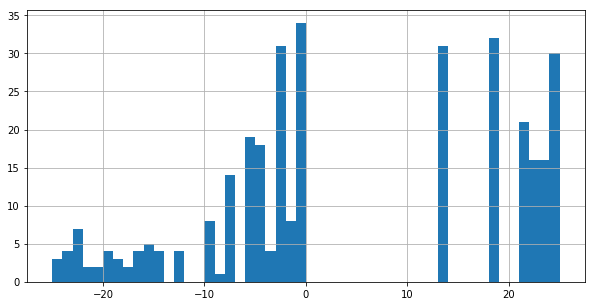

In [55]:
df_estimates_false['points'].hist(bins=50, figsize=(10,5))
plt.show()
# it seems the overal quality of estimate is not that high?

check consensus data

In [79]:
# need to fix format issue on 'lastest_consensus_created_date' column.
df_concensus = pd.read_csv( pwd+'/consensus_shift_history.052317.csv') #consensus?

C:\Users\wangz\Anaconda2\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (9,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [80]:
df_concensus.head(20)

,ticker,report_date,fiscal_year,fiscal_quarter,report_date.1,metric,revise_date,latest_consensus_created_date,actual,mean,high,low,standard_deviation,esimates_count
0,STI,21/10/2016,2016,3,21/10/2016,eps,14:14.4,14/09/2016,0.91,0.913333333,0.94,0.89,0.020548047,3
1,STI,21/10/2016,2016,3,21/10/2016,eps,33:13.3,28/09/2016,0.91,0.905,0.94,0.88,0.022912878,4
2,STI,21/10/2016,2016,3,21/10/2016,eps,22:14.2,4/10/16,0.91,0.9025,0.94,0.88,0.022776084,4
3,STI,21/10/2016,2016,3,21/10/2016,eps,01:49.8,5/10/16,0.91,0.904,0.94,0.88,0.02059126,5
4,STI,21/10/2016,2016,3,21/10/2016,eps,24:25.0,6/10/16,0.91,0.921666667,1.01,0.88,0.043748016,6
5,STI,21/10/2016,2016,3,21/10/2016,eps,33:46.8,7/10/16,0.91,0.915,1.01,0.88,0.03968627,8
6,STI,21/10/2016,2016,3,21/10/2016,eps,16:05.5,10/10/16,0.91,0.915,1.01,0.88,0.03968627,8
7,STI,21/10/2016,2016,3,21/10/2016,eps,38:15.0,12/10/16,0.91,0.916666667,1.01,0.88,0.037712362,9
8,STI,21/10/2016,2016,3,21/10/2016,eps,42:42.6,14/10/2016,0.91,0.915,1.01,0.88,0.036124784,10
9,STI,21/10/2016,2016,3,21/10/2016,eps,48:18.4,16/10/2016,0.91,0.913636364,1.01,0.88,0.034712515,11


In [313]:
df_concensus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334667 entries, 0 to 334666
Data columns (total 14 columns):
ticker                           334667 non-null object
report_date                      334667 non-null object
fiscal_year                      334667 non-null int64
fiscal_quarter                   334667 non-null int64
report_date.1                    334667 non-null object
metric                           334667 non-null object
revise_date                      334314 non-null object
latest_consensus_created_date    334314 non-null object
actual                           333149 non-null float64
mean                             334667 non-null object
high                             334667 non-null float64
low                              334667 non-null float64
standard_deviation               334667 non-null object
esimates_count                   334667 non-null int64
dtypes: float64(3), int64(3), object(8)
memory usage: 35.7+ MB


In [85]:
df_concensus['esimates_count'].describe()
# all the estimateds_count in the file is >= 3.

count    334667.000000
mean         18.805670
std          33.938082
min           3.000000
25%           5.000000
50%           8.000000
75%          19.000000
max        1184.000000
Name: esimates_count, dtype: float64

In [88]:
# check all the concensus before UAA 2017 Q1 release
df_concensus_uaa = df_concensus[(df_concensus['ticker']=='UAA') & (df_concensus['fiscal_year'] == 2017)]
df_concensus_uaa

,ticker,report_date,fiscal_year,fiscal_quarter,report_date.1,metric,revise_date,latest_consensus_created_date,actual,mean,high,low,standard_deviation,esimates_count
75903,UAA,27/04/2017,2017,1,27/04/2017,eps,31:14.8,22/04/2016,-0.01,0.06,0.07,0.05,0.008164966,3
75904,UAA,27/04/2017,2017,1,27/04/2017,eps,01:31.2,1/6/16,-0.01,0.06,0.07,0.05,0.008164966,3
75905,UAA,27/04/2017,2017,1,27/04/2017,eps,04:32.3,27/07/2016,-0.01,0.06,0.07,0.05,0.008164966,3
75906,UAA,27/04/2017,2017,1,27/04/2017,eps,04:39.3,24/08/2016,-0.01,0.06,0.07,0.05,0.008164966,3
75907,UAA,27/04/2017,2017,1,27/04/2017,eps,57:55.2,30/08/2016,-0.01,0.06,0.07,0.05,0.007071068,4
75908,UAA,27/04/2017,2017,1,27/04/2017,eps,49:04.5,5/10/16,-0.01,0.056,0.07,0.04,0.010198039,5
75909,UAA,27/04/2017,2017,1,27/04/2017,eps,52:17.3,16/10/2016,-0.01,0.053333333,0.07,0.04,0.011055416,6
75910,UAA,27/04/2017,2017,1,27/04/2017,eps,43:27.8,17/10/2016,-0.01,0.054285714,0.07,0.04,0.010497813,7
75911,UAA,27/04/2017,2017,1,27/04/2017,eps,40:47.1,18/10/2016,-0.01,0.053,0.07,0.04,0.010049876,10
75912,UAA,27/04/2017,2017,1,27/04/2017,eps,29:32.0,19/10/2016,-0.01,0.057142857,0.09,0.04,0.012777531,14


In [89]:
#“%d/%m/%Y”, some problem for date format transformation, using dayfirst=True to fix them.
df_concensus_uaa['latest_consensus_created_date'] = pd.to_datetime(df_concensus_uaa['latest_consensus_created_date'], dayfirst=True)

C:\Users\wangz\Anaconda2\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [90]:
df_concensus_uaa.head()

,ticker,report_date,fiscal_year,fiscal_quarter,report_date.1,metric,revise_date,latest_consensus_created_date,actual,mean,high,low,standard_deviation,esimates_count
75903,UAA,27/04/2017,2017,1,27/04/2017,eps,31:14.8,2016-04-22,-0.01,0.06,0.07,0.05,0.008164966,3
75904,UAA,27/04/2017,2017,1,27/04/2017,eps,01:31.2,2016-06-01,-0.01,0.06,0.07,0.05,0.008164966,3
75905,UAA,27/04/2017,2017,1,27/04/2017,eps,04:32.3,2016-07-27,-0.01,0.06,0.07,0.05,0.008164966,3
75906,UAA,27/04/2017,2017,1,27/04/2017,eps,04:39.3,2016-08-24,-0.01,0.06,0.07,0.05,0.008164966,3
75907,UAA,27/04/2017,2017,1,27/04/2017,eps,57:55.2,2016-08-30,-0.01,0.06,0.07,0.05,0.007071068,4


In [317]:
df_concensus_uaa.sort_values('latest_consensus_created_date')

,ticker,report_date,fiscal_year,fiscal_quarter,report_date.1,metric,revise_date,latest_consensus_created_date,actual,mean,high,low,standard_deviation,esimates_count
75903,UAA,27/04/2017,2017,1,27/04/2017,eps,31:14.8,2016-04-22,-0.01,0.06,0.07,0.05,0.008164966,3
243458,UAA,27/04/2017,2017,1,27/04/2017,revenue,31:14.8,2016-04-22,1117.00,1330.58,1342.64,1307.70,16.1865,3
243459,UAA,27/04/2017,2017,1,27/04/2017,revenue,01:31.2,2016-06-01,1117.00,1338.58,1342.64,1331.70,4.89116,3
75904,UAA,27/04/2017,2017,1,27/04/2017,eps,01:31.2,2016-06-01,-0.01,0.06,0.07,0.05,0.008164966,3
243460,UAA,27/04/2017,2017,1,27/04/2017,revenue,04:32.3,2016-07-27,1117.00,1337.41,1342.64,1331.70,4.47947,3
75905,UAA,27/04/2017,2017,1,27/04/2017,eps,04:32.3,2016-07-27,-0.01,0.06,0.07,0.05,0.008164966,3
243461,UAA,27/04/2017,2017,1,27/04/2017,revenue,04:39.3,2016-08-24,1117.00,1332.95,1342.64,1318.30,10.536,3
75906,UAA,27/04/2017,2017,1,27/04/2017,eps,04:39.3,2016-08-24,-0.01,0.06,0.07,0.05,0.008164966,3
243462,UAA,27/04/2017,2017,1,27/04/2017,revenue,57:55.2,2016-08-30,1117.00,1321.96,1342.64,1289.00,21.1039,4
75907,UAA,27/04/2017,2017,1,27/04/2017,eps,57:55.2,2016-08-30,-0.01,0.06,0.07,0.05,0.007071068,4


In [318]:
df_concensus_uaa = df_concensus_uaa.set_index(['latest_consensus_created_date'])
df_concensus_uaa

,ticker,report_date,fiscal_year,fiscal_quarter,report_date.1,metric,revise_date,actual,mean,high,low,standard_deviation,esimates_count
latest_consensus_created_date,,,,,,,,,,,,,
2016-04-22,UAA,27/04/2017,2017,1,27/04/2017,eps,31:14.8,-0.01,0.06,0.07,0.05,0.008164966,3
2016-06-01,UAA,27/04/2017,2017,1,27/04/2017,eps,01:31.2,-0.01,0.06,0.07,0.05,0.008164966,3
2016-07-27,UAA,27/04/2017,2017,1,27/04/2017,eps,04:32.3,-0.01,0.06,0.07,0.05,0.008164966,3
2016-08-24,UAA,27/04/2017,2017,1,27/04/2017,eps,04:39.3,-0.01,0.06,0.07,0.05,0.008164966,3
2016-08-30,UAA,27/04/2017,2017,1,27/04/2017,eps,57:55.2,-0.01,0.06,0.07,0.05,0.007071068,4
2016-10-05,UAA,27/04/2017,2017,1,27/04/2017,eps,49:04.5,-0.01,0.056,0.07,0.04,0.010198039,5
2016-10-16,UAA,27/04/2017,2017,1,27/04/2017,eps,52:17.3,-0.01,0.053333333,0.07,0.04,0.011055416,6
2016-10-17,UAA,27/04/2017,2017,1,27/04/2017,eps,43:27.8,-0.01,0.054285714,0.07,0.04,0.010497813,7
2016-10-18,UAA,27/04/2017,2017,1,27/04/2017,eps,40:47.1,-0.01,0.053,0.07,0.04,0.010049876,10


In [98]:
#sort lastest_consensus_created_date to find the latest ones.
df_concensus_uaa = df_concensus_uaa.sort_index()

In [99]:
df_concensus_uaa.groupby('metric').tail(3) #last three records of consensus, how many records to we need before the final release?

,ticker,report_date,fiscal_year,fiscal_quarter,report_date.1,metric,revise_date,latest_consensus_created_date,actual,mean,high,low,standard_deviation,esimates_count
75975,UAA,27/04/2017,2017,1,27/04/2017,eps,23:06.4,2017-04-25,-0.01,0.008617886,0.1,-0.07,0.037834152,123
75976,UAA,27/04/2017,2017,1,27/04/2017,eps,50:25.0,2017-04-26,-0.01,0.000764331,0.1,-0.07,0.038167272,157
75977,UAA,27/04/2017,2017,1,27/04/2017,eps,27:37.8,2017-04-27,-0.01,-0.000987654,0.1,-0.07,0.037420036,162
243531,UAA,27/04/2017,2017,1,27/04/2017,revenue,23:06.6,2017-04-25,1117.00,1189.97,1423.0,1048.00,86.6921,124
243532,UAA,27/04/2017,2017,1,27/04/2017,revenue,50:25.0,2017-04-26,1117.00,1170.65,1423.0,999.00,84.3827,158
243533,UAA,27/04/2017,2017,1,27/04/2017,revenue,27:37.9,2017-04-27,1117.00,1166.33,1423.0,999.00,82.4095,163


In [108]:
df_concensus_uaa_eps = df_concensus_uaa[df_concensus_uaa['metric']=='eps']
df_concensus_uaa_rev = df_concensus_uaa[df_concensus_uaa['metric']=='revenue']

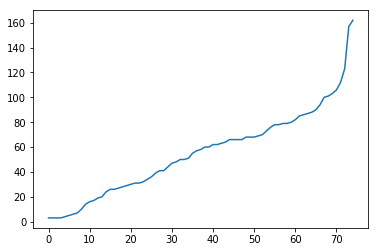

In [107]:
plt.plot(range(df_concensus_uaa_eps.shape[0]), df_concensus_uaa_eps['esimates_count'])

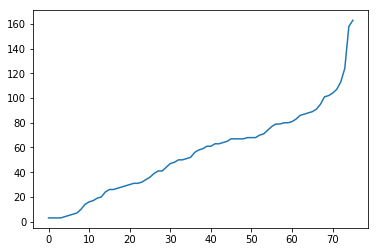

In [110]:
plt.plot(range(df_concensus_uaa_rev.shape[0]), df_concensus_uaa_rev['esimates_count'])